In [1]:
import warnings

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Activation, Flatten

In [2]:
warnings.filterwarnings(action='ignore', category=UserWarning)

df = pd.read_excel('./DATASET.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  101 non-null    object 
 1   year        1009 non-null   int64  
 2   Para-1      1009 non-null   float64
 3   Para-2      1009 non-null   float64
 4   Para-3      1009 non-null   float64
 5   Para-4      1009 non-null   float64
 6   Para-5      1009 non-null   int64  
 7   Para-6      1009 non-null   int64  
 8   Para-7      1009 non-null   int64  
 9   Para-8      1009 non-null   int64  
 10  Para-9      1009 non-null   float64
 11  Para-10     1009 non-null   float64
 12  Para-11     1009 non-null   float64
 13  Para-12     1009 non-null   int64  
 14  Para-13     1007 non-null   float64
dtypes: float64(8), int64(6), object(1)
memory usage: 118.4+ KB
None


In [3]:
df.rename(columns={'Unnamed: 0':'Section'}, inplace=True)
df['Section'].ffill(axis=0, inplace=True)
df_sections = df.groupby('Section', dropna=False)

print(f'Grouped dataframe by sections\nDataFrame Size: {len(df)}\nGroups: {len(df_sections)}')

Grouped dataframe by sections
DataFrame Size: 1009
Groups: 101


In [4]:
def check_null(df):
    null_entries = df.loc[:,'year':].isnull().any(axis=1)
    count = null_entries.sum()
    print(f'Null Values Found: {count}')
    if count>0:
        print(df[null_entries])
        print()

In [5]:
check_null(df)
df.fillna(method='bfill',inplace=True)
check_null(df)

Null Values Found: 2
    Section  year  Para-1  Para-2  Para-3  Para-4  Para-5  Para-6  Para-7  \
190  Sec_20     1   454.6   145.6    21.7     0.0       3     106    3650   
260  Sec_27     1   563.9   336.6    21.3     0.0       4     106    6800   

     Para-8  Para-9  Para-10  Para-11  Para-12  Para-13  
190     730     0.0      0.0      0.0        0      NaN  
260    1600     0.0      0.0      0.0        0      NaN  

Null Values Found: 0


In [6]:
print('Para-13 analysis')
# fig, axs = plt.subplots(4, 3,figsize=(10,10))
# x, y = 0,-1
# for i in range(len(df_sections)):
#     if i%10 == 0:
#         y = y+1
#         x = x+(y//3)
#         y = y%3
#     axs[x,y].plot(range(len(list(df_sections)[i][1])), list(df_sections)[i][1]['Para-13'])

Para-13 analysis


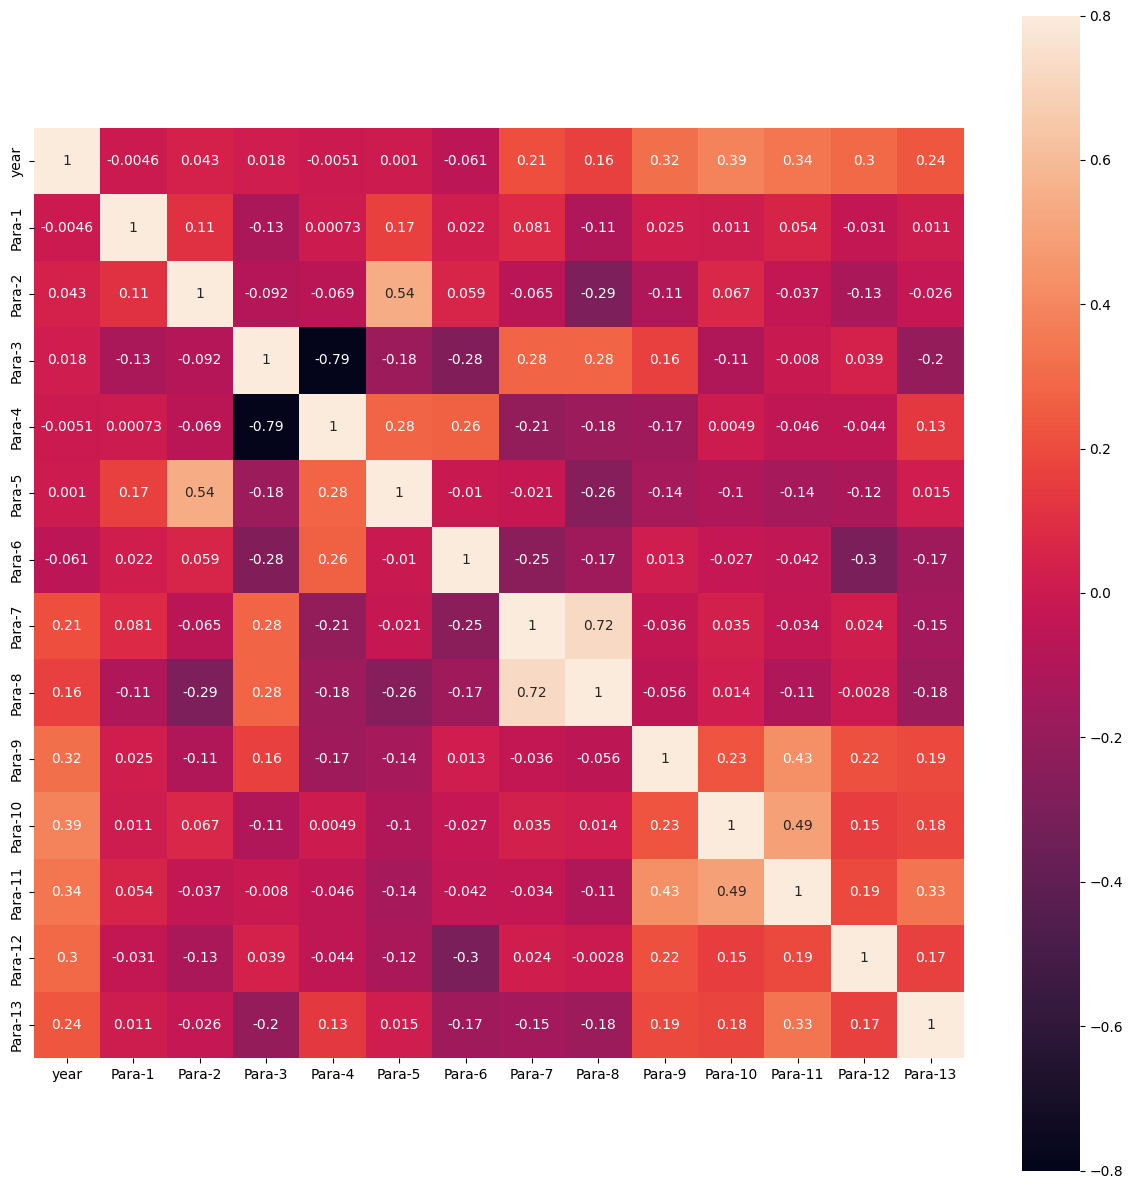

In [7]:
C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sns.heatmap(C_mat, vmax = 0.8, vmin = -0.8,  square = True, annot=True)
plt.show()

In [8]:
train = df.loc[:,'Para-1':'Para-8']
target = df.loc[:,'Para-9':]
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.1, random_state=42)
# train test split


In [9]:
NN_model = Sequential()

NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(5, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 167,045
Trainable params: 167,045
Non-trainable params: 0
_________________________________________________________________


In [10]:
checkpoint_name = 'Weights-{epoch:03d}--{accuracy:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='accuracy', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [11]:

history = NN_model.fit(x_train, y_train, epochs=80, batch_size=32, validation_split = 0.25, callbacks=callbacks_list)

Epoch 1/80
18/22 [=======================>......] - ETA: 0s - loss: 33.8001 - accuracy: 0.5781
Epoch 1: accuracy improved from -inf to 0.55507, saving model to Weights-001--0.55507.hdf5
22/22 [==============================] - 3s 45ms/step - loss: 32.7644 - accuracy: 0.5551 - val_loss: 26.9424 - val_accuracy: 0.5991
Epoch 2/80
19/22 [========================>.....] - ETA: 0s - loss: 29.4933 - accuracy: 0.5855
Epoch 2: accuracy improved from 0.55507 to 0.57856, saving model to Weights-002--0.57856.hdf5
22/22 [==============================] - 0s 14ms/step - loss: 29.7025 - accuracy: 0.5786 - val_loss: 26.4170 - val_accuracy: 0.5991
Epoch 3/80
18/22 [=======================>......] - ETA: 0s - loss: 28.9788 - accuracy: 0.5677
Epoch 3: accuracy did not improve from 0.57856
22/22 [==============================] - 0s 12ms/step - loss: 28.8402 - accuracy: 0.5786 - val_loss: 25.9119 - val_accuracy: 0.5991
Epoch 4/80
10/22 [============>.................] - ETA: 0s - loss: 28.9872 - accuracy:

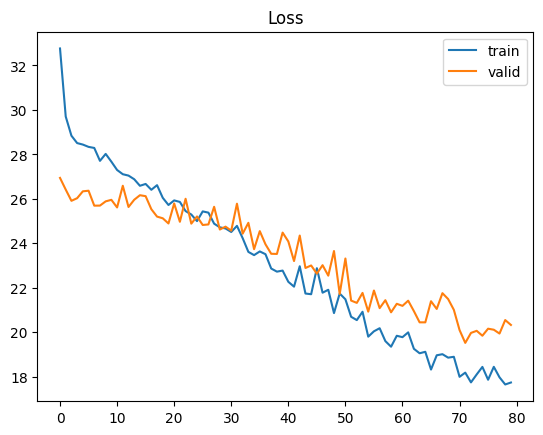

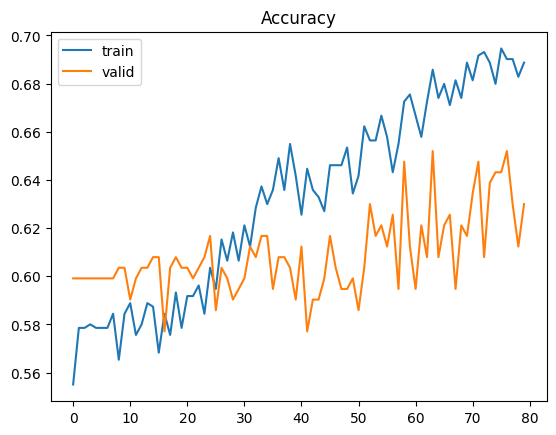

In [12]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()
plt.show()

In [13]:
# NN_model.load_weights(best_model)
# NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# predictions = NN_model.predict(x_test)
# accr = model.evaluate()

In [14]:
best_model = './Weights-075--0.70338.hdf5'
NN_model.load_weights(best_model)
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = './Weights-075--0.70338.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
predictions = NN_model.evaluate(x=x_test, y=y_test)
print(predictions)
predictions = NN_model.predict(x_test)
r2 = r2_score(y_pred=predictions, y_true=y_test)
mae = mean_absolute_error(y_pred=predictions, y_true=y_test)
rmse = mean_squared_error(y_pred=predictions, y_true=y_test, squared=False)
print(f'R Square: {r2:.3f}\nMean Absolute Error: {mae:.3f}\nRMSE: {rmse:.3f}')

4/4 [==============================] - 0s 3ms/step - loss: 21.8134 - mean_absolute_error: 21.8134
[21.81336784362793, 21.81336784362793]
4/4 [==============================] - 0s 3ms/step
R Square: 0.096
Mean Absolute Error: 21.813
RMSE: 38.563
